In [ ]:
# package installation for prr
!pip install aif360
!pip install aif360[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 1.4 MB/s eta 0:00:00


# Task 1:
Data Visualization (DV): Load the dataset and perform exploratory data analysis via appropriate visualization. Illustrate via visualization how and if protected variables such as gender and ethnicity influence the approval decision.



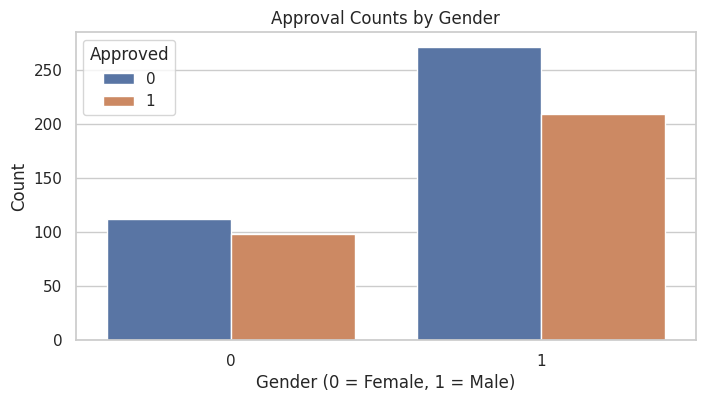

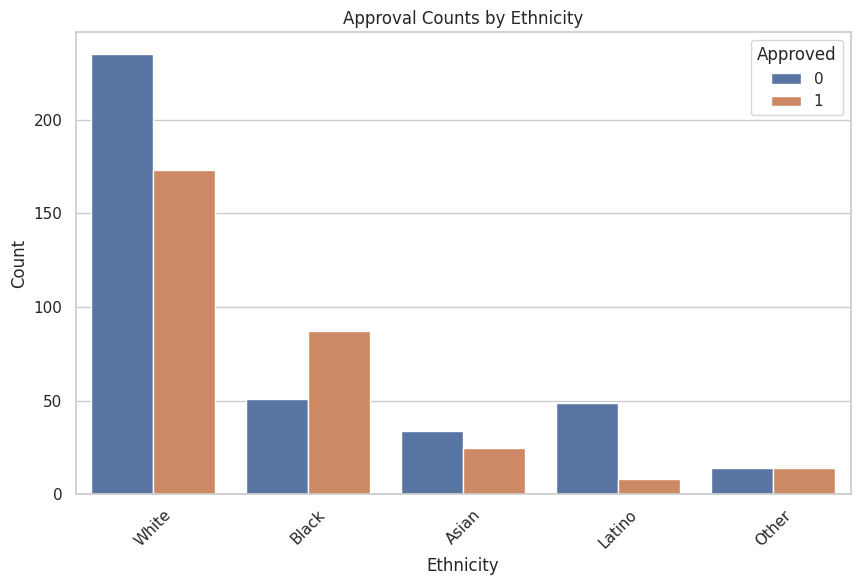

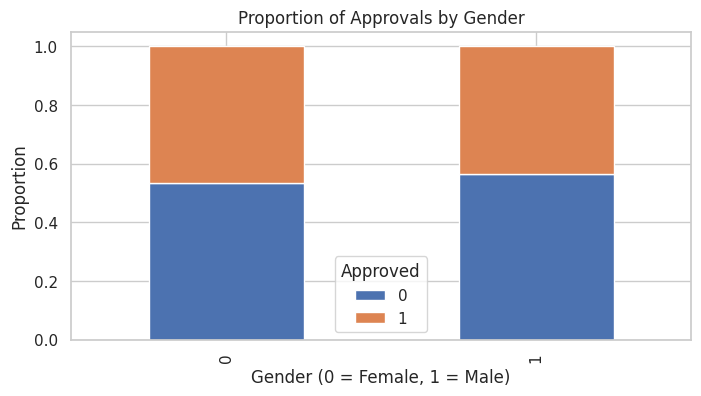

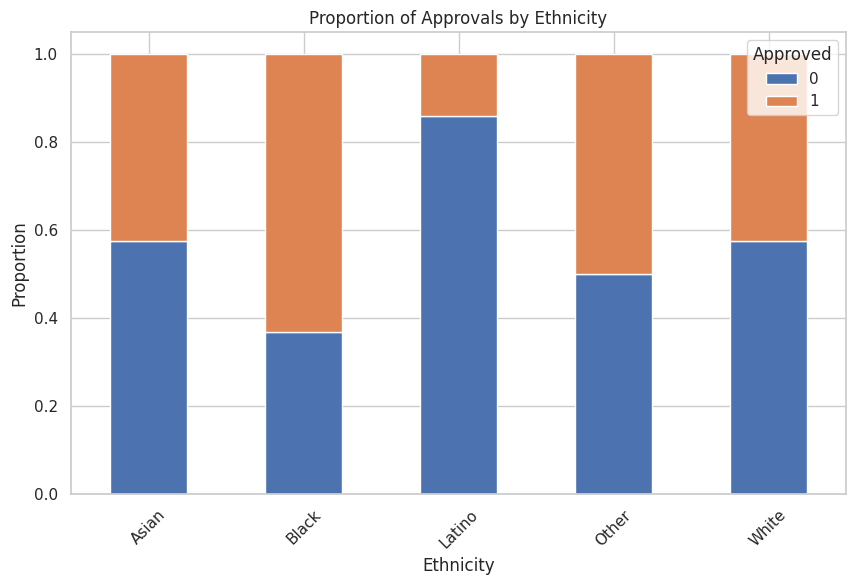

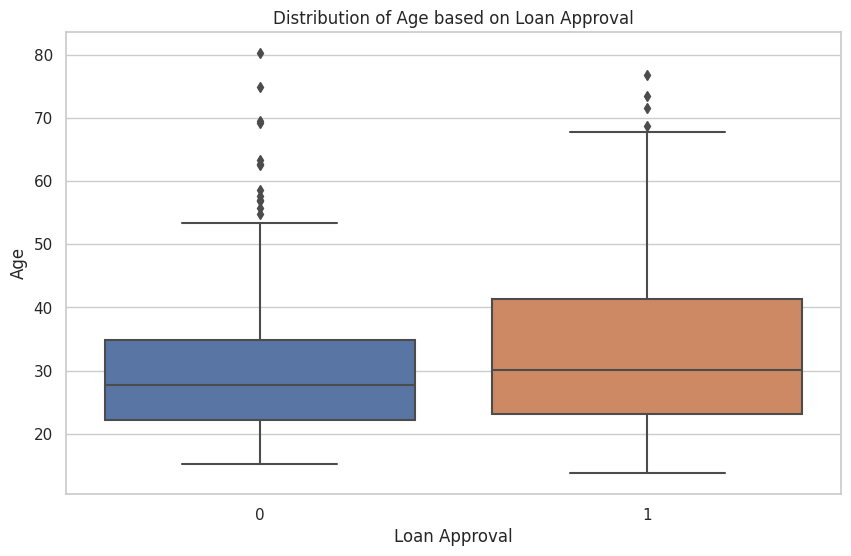

In [54]:
# Steps done in Task 1
# 1. Load the dataset
# 2. Exploratory Data Analysis (EDA)
# 3. Visualizing the relationship between protected variables and the approval decision.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the style for seaborn
sns.set_style("whitegrid")

# Load the dataframe
df = pd.read_csv('clean_dataset.csv')


# visualizations:

##Gender vs. Approval
## Gender distribution with respect to Approval
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender', hue='Approved')
plt.title('Approval Counts by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


##Ethnicity vs. Approval
## Ethnicity distribution with respect to Approval
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ethnicity', hue='Approved')
plt.title('Approval Counts by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


#These plots will give us a visual understanding of how gender and ethnicity are related to the approval decision.
#The count plots will show the number of approved and not approved applications across these categories.


##Proportions of Approval by Gender
## Calculate proportions
gender_approval = df.groupby('Gender')['Approved'].value_counts(normalize=True).unstack()
gender_approval.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Proportion of Approvals by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Proportion')
plt.show()


##Proportions of Approval by Ethnicity
## Calculate proportions
ethnicity_approval = df.groupby('Ethnicity')['Approved'].value_counts(normalize=True).unstack()
ethnicity_approval.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Approvals by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


# Seaborn to create a box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Approved', y='Age', data=df)
plt.xlabel('Loan Approval')
plt.ylabel('Age')
plt.title('Distribution of Age based on Loan Approval')
plt.show()


Observation:
<p>
Plot 1 [Count plot on Ethnicity vs Loan Approval]:As seen in plotted graph that the loan approval rate is not same/similar for all the people for different ethinicity. As plot shows, People with Balck ethinicity has much higher approavl rate(>50 %) than other people with other ethinicity. People with Latio ethinicity has lowest approval rate (<<50%). For most of the people except Balck and Other, approval rate is less than 50%. People with Other ethinicity has almost 50 % approval rate.
<p>
Plot 2 [Bar plot on Gender vs Loan Approval]: As we can see in plotted graph that the loan approval rate for Gender 1 is less than gender 0. Although there is not a very huge gap in approval ratio but it's not same.
<p>
Plot 3 [Bar plot on Ethnicity vs Loan Approval]: The plotted graph shows that the loan acceptance rate is not the same/similar for all people of different ethnicities. As the graph illustrates, people of black ethnicity have a substantially greater approval percentage (>50%) than people of other ethnicities. People of Latio ethnicity have the lowest approval rate (50%). Except for Balck and Other, the approval rate for the majority of people is less than 50%. People of other ethnicities have nearly 50% approval rate.

<p>
Plot 4 [Box plot on Age vs Loan Approval]:Since age is a continous random variable, we have plotted box plot to visualize the data distribution. As seen in plot, we can see that around 50% of the applicant is between aged 20 to 35. Also people with 50+ age above is very low and lot of their loan has got rejected. Also more than 75% of the applicant is aged less than 40. For loan approved applicant, quartile group 1 & 4 range is more than loan rejected applicant.


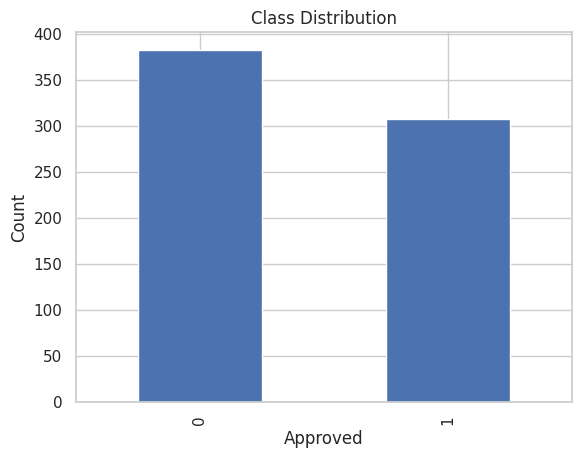

In [56]:
# Class distribution of Approved column
class_counts = df['Approved'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Approved')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

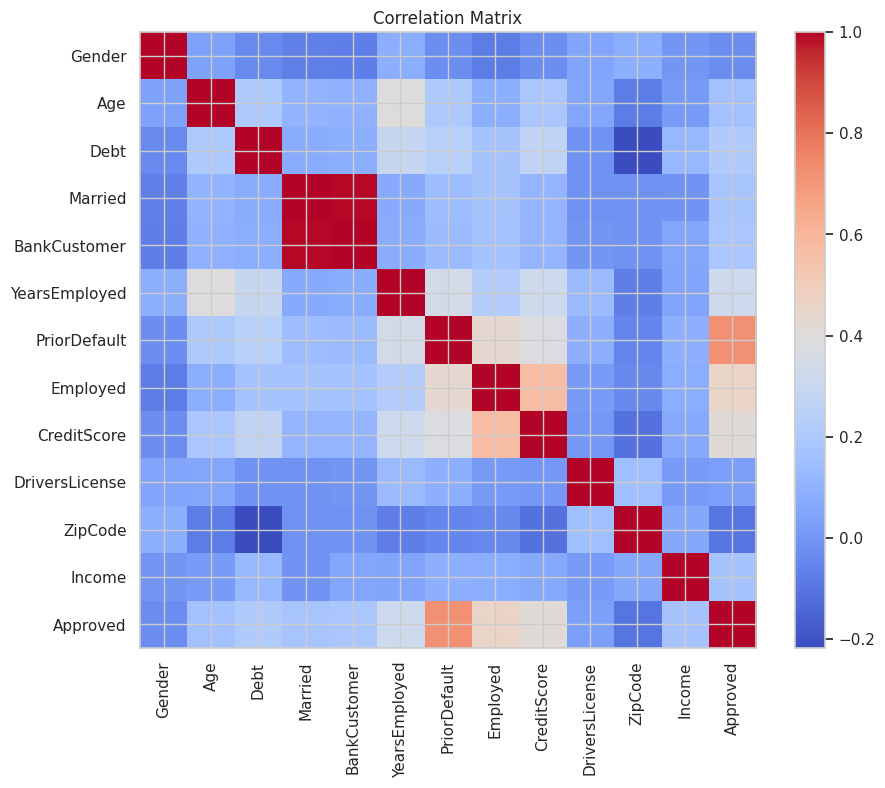

In [57]:
# Check the corelation matrix to analyse how each columns influnce the loan approval decision
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

Because correlation shows how two traits are related to one another. A column with a low corelation coefficient value against the target column has a low weightage in determining the target feature value, and vice versa. In the above corelation matrices/heatmap, we can observe that PriorDefault has the greatest influence on loan acceptance decisions, while zip code has the least. Aside from PriorDefault, Employed, CreditScore, and YearsEmployed, YearsEmployed has a greater impact on loan approval decision than any other column.

In [58]:
#count of unique values for each column
unique_counts = df.nunique()
print(unique_counts)

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64


In [59]:
# Checking dataset has any missing values
missing_values = df.isna().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [60]:
# statical distribution of each column in dataset
df.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


# Task 2:
Fairness Metric (FM): Write your "own" functions to compute group-level fairness metrics: demographic parity, equality of odds, and equality of opportunity. You can use any classifier model to get predicted outputs.

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


# Convert 'ZipCode' to a string as it's a categorical feature, not numerical
df['ZipCode'] = df['ZipCode'].astype(str)

# Define numerical and categorical features
numerical_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
categorical_features = ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'DriversLicense', 'Citizen', 'ZipCode']

# Define ColumnTransformer to handle feature scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Prepare features and labels
X = df.drop('Approved', axis=1)
y = df['Approved']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing and modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Train pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict outcomes on the test set
y_pred = pipeline.predict(X_test)


# Functions to compute the fairness metrics:

# Equality of Opportunity: It measures whether each group has equal true positive rates.
def equality_of_opportunity(y_true, y_pred, protected_attribute):
    eo = {}
    unique_groups = np.unique(protected_attribute)
    for group in unique_groups:
        group_mask = (protected_attribute == group)
        if np.sum(group_mask) > 0:
            # Ensure the confusion matrix is always 2x2 by specifying the labels
            cm = confusion_matrix(y_true[group_mask], y_pred[group_mask], labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            eo[group] = tp / (tp + fn) if (tp + fn) > 0 else 0
    return eo


# Equality of Odds: It measures whether each group has equal true positive rates and false positive rates.
def equality_of_odds(y_true, y_pred, protected_attribute):
    eo = {}
    unique_groups = np.unique(protected_attribute)
    for group in unique_groups:
        group_mask = (protected_attribute == group)
        if np.sum(group_mask) > 0:
            # Specify the labels to ensure the confusion matrix is always 2x2
            cm = confusion_matrix(y_true[group_mask], y_pred[group_mask], labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            tpr = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
            fpr = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
            eo[group] = {'TPR': tpr, 'FPR': fpr}
    return eo


# Demographic Parity: It measures whether each group has equal probability of being predicted as positive.
def demographic_parity(y_true, y_pred, protected_attribute):
    dp = {}
    unique_groups = np.unique(protected_attribute)
    for group in unique_groups:
        group_mask = (protected_attribute == group)
        # Ensure at least one sample of the group is present
        if np.sum(group_mask) > 0:
            dp[group] = y_pred[group_mask].mean()
    return dp


# Usage example on Gender Sensitive Protected Data

gender_dp = demographic_parity(df.loc[X_test.index, 'Approved'], y_pred, df.loc[X_test.index, 'Gender'])
print('demographic_parity', gender_dp)

gender_eo = equality_of_opportunity(df.loc[X_test.index, 'Approved'], y_pred, df.loc[X_test.index, 'Gender'])
print('equality_of_opportunity', gender_eo)

gender_eod = equality_of_odds(df.loc[X_test.index, 'Approved'], y_pred, df.loc[X_test.index, 'Gender'])
print('equality_of_odds', gender_eod)

demographic_parity {0: 0.35555555555555557, 1: 0.3978494623655914}
equality_of_opportunity {0: 0.6363636363636364, 1: 0.6041666666666666}
equality_of_odds {0: {'TPR': 0.6363636363636364, 'FPR': 0.08695652173913043}, 1: {'TPR': 0.6041666666666666, 'FPR': 0.17777777777777778}}


# Task 3:
Logistic Regression with all features (LR-All): Using 5 fold cross-validation, build the logistic regression model with all attributes and report the group-level fairness metrics and accuracy. No regularization should be applied. Appropriate encoding of input variables and normalization should be used.

In [ ]:
#Steps for Task3
# 1. Preprocess the data - Encode categorical variables and normalize numerical features.
# 2. Build the logistic regression model - Use LogisticRegression with no regularization (penalty='none').
# 3. Cross-validation and training - Use cross_val_predict to get predictions from 5-fold cross-validation.
# 4. Calculate fairness metrics and accuracy - Use the functions from the previous response to calculate fairness metrics and accuracy_score for accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert 'ZipCode' to a string to treat it as a categorical feature
df['ZipCode'] = df['ZipCode'].astype(str)

# Define numerical and categorical features
numerical_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
categorical_features = ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'DriversLicense', 'Citizen', 'ZipCode']

# Define preprocessor with StandardScaler and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the logistic regression model with no regularization
logistic_regression_clf = LogisticRegression(penalty='none', max_iter=1000)

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_regression_clf)])

# Prepare features and labels
X = df.drop('Approved', axis=1)
y = df['Approved']

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5)

# Use cross_val_predict to get the predictions from cross-validation
y_pred = cross_val_predict(pipeline, X, y, cv=cv, method='predict')

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
# print(f'Accuracy: {accuracy:.4f}')


# Calculate the group-level fairness metrics using the functions defined earlier:

# fairness metrics for 'Gender'
gender_dp = demographic_parity(y, y_pred, df['Gender'])
gender_eo = equality_of_opportunity(y, y_pred, df['Gender'])
gender_eod = equality_of_odds(y, y_pred, df['Gender'])

# fairness metrics for 'Ethnicity'
ethnicity_dp = demographic_parity(y, y_pred, df['Ethnicity'])
ethnicity_eo = equality_of_opportunity(y, y_pred, df['Ethnicity'])
ethnicity_eod = equality_of_odds(y, y_pred, df['Ethnicity'])

# Append the results
results = [{
    'Model': 'LR',
    'Accuracy': accuracy,
    'Gender demographic_parity': gender_dp,
    'Gender equality_of_opportunity': gender_eo,
    'Gender equality_of_odds': gender_eod,
    'Ethnicity demographic_parity': ethnicity_dp,
    'Ethnicity equality_of_opportunity': ethnicity_eo,
    'Ethnicity equality_of_odds': ethnicity_eod
}]

# Convert the results list to a DataFrame for easy comparison
result_df = pd.DataFrame(results)

# Output the comparison
display(result_df)

,Model,Accuracy,Gender demographic_parity,Gender equality_of_opportunity,Gender equality_of_odds,Ethnicity demographic_parity,Ethnicity equality_of_opportunity,Ethnicity equality_of_odds
0,LR,0.752174,"{0: 0.40476190476190477, 1: 0.36875}","{0: 0.673469387755102, 1: 0.6363636363636364}","{0: {'TPR': 0.673469387755102, 'FPR': 0.169642...","{'Asian': 0.3220338983050847, 'Black': 0.60144...","{'Asian': 0.52, 'Black': 0.7816091954022989, '...","{'Asian': {'TPR': 0.52, 'FPR': 0.1764705882352..."


# Task 4:
Logistic Regression without sensitive features (LR-NS): Using 5 fold cross-validation, build a single hidden layer multilayer perceptron model (with appropriate number of hidden nodes) without the sensitive attributes and report the accuracy and group-level fairness metrics. No regularization should be applied.

In [ ]:
# Steps:
# 1. Preprocess the data - Exclude sensitive attributes, encode categorical variables, and normalize numerical features.
# 2. Build the MLP model - Define the MLPClassifier with one hidden layer.
# 3. Cross-validation and training - Use cross_val_predict to get predictions from 5-fold cross-validation.
# 4. Calculate fairness metrics and accuracy - Use the previously defined functions for fairness metrics and accuracy_score for accuracy.

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Convert 'ZipCode' to a string to treat it as a categorical feature
df['ZipCode'] = df['ZipCode'].astype(str)

# Define numerical and categorical features, excluding sensitive attributes
numerical_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']
categorical_features = ['Married', 'BankCustomer', 'Industry', 'DriversLicense', 'Citizen', 'ZipCode']

# Define preprocessor with StandardScaler and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the MLP model with one hidden layer (for example, with 64 hidden nodes)
# Set alpha to a high value to minimize the effect of regularization
mlp_classifier = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', alpha=1e-5, max_iter=500)

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', mlp_classifier)])

# Prepare features (excluding sensitive ones) and labels
X = df.drop(['Approved', 'Gender', 'Ethnicity'], axis=1)
y = df['Approved']

# Define 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5)

# Use cross_val_predict to get the predictions from cross-validation
y_pred = cross_val_predict(pipeline, X, y, cv=cv, method='predict')

# accuracy
accuracy = accuracy_score(y, y_pred)
# print(f'Accuracy: {accuracy:.4f}')


# Calculate fairness metrics using the sensitive attributes and the predictions:

# sensitive attributes to measure fairness
sensitive_attributes = ['Gender', 'Ethnicity']

# Calculate fairness metrics for each sensitive attribute
fairness_metrics = {}
for attr in sensitive_attributes:
    fairness_metrics[attr] = {
        'demographic_parity': demographic_parity(y, y_pred, df[attr]),
        'equality_of_opportunity': equality_of_opportunity(y, y_pred, df[attr]),
        'equality_of_odds': equality_of_odds(y, y_pred, df[attr])
    }

results_mlp = [{
        'Model': 'MLP',
        'Accuracy': accuracy,
        **{f"{attr} {metric}": value for attr, metrics in fairness_metrics.items() for metric, value in metrics.items()}
    }]

# Convert the MLP results list to a DataFrame
mlp_results_df = pd.DataFrame(results_mlp)


# Append the MLP results to the existing result_df
result_df = result_df.append(mlp_results_df, ignore_index=True)
display(result_df)

,Model,Accuracy,Gender demographic_parity,Gender equality_of_opportunity,Gender equality_of_odds,Ethnicity demographic_parity,Ethnicity equality_of_opportunity,Ethnicity equality_of_odds
0,LR,0.752174,"{0: 0.40476190476190477, 1: 0.36875}","{0: 0.673469387755102, 1: 0.6363636363636364}","{0: {'TPR': 0.673469387755102, 'FPR': 0.169642...","{'Asian': 0.3220338983050847, 'Black': 0.60144...","{'Asian': 0.52, 'Black': 0.7816091954022989, '...","{'Asian': {'TPR': 0.52, 'FPR': 0.1764705882352..."
1,MLP,0.730435,"{0: 0.40476190476190477, 1: 0.4083333333333333}","{0: 0.6428571428571429, 1: 0.6602870813397129}","{0: {'TPR': 0.6428571428571429, 'FPR': 0.19642...","{'Asian': 0.4067796610169492, 'Black': 0.57971...","{'Asian': 0.56, 'Black': 0.7471264367816092, '...","{'Asian': {'TPR': 0.56, 'FPR': 0.2941176470588..."


# Task 5:
 Prejudice Removal Regularizer (PRR): Incorporate prejudice removal regularizer with 4 appropriately chosen regularization constants and report the accuracy and group-level fairness metrics using 5 fold cross validation for all chosen regularization constants. Use any existing library function to implement PRR.

In [ ]:
# Steps:
# 1.Preprocess the data - Encode categorical variables and normalize numerical features.
# 2. Apply prejudice removal - Use AIF360's PrejudiceRemover class with different regularization constants.
# 3. Cross-validation - Perform 5-fold cross-validation using the AIF360's PrejudiceRemover.
# 4. Report accuracy and fairness metrics - Calculate accuracy and group-level fairness metrics for each regularization constant.


import pandas as pd
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Convert categorical columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Industry', 'Ethnicity', 'Married', 'BankCustomer', 'Citizen'])

# column names after one-hot encoding
print("Column names after one-hot encoding:", df_encoded.columns.tolist())

# Update sensitive_attributes list with the correct names from df_encoded
sensitive_attributes = ['Gender'] + [col for col in df_encoded.columns if 'Ethnicity_' in col]

# Scale the numeric features to standardize them
numeric_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income', 'ZipCode']  # Add other numeric columns if necessary
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Convert DataFrame to a BinaryLabelDataset
def to_aif360(df, sensitive_attributes, label_name):
    return BinaryLabelDataset(df=df,
                              label_names=[label_name],
                              protected_attribute_names=sensitive_attributes)

# Convert DataFrame to AIF360 format
aif360_dataset = to_aif360(df_encoded, sensitive_attributes=sensitive_attributes, label_name='Approved')

# Define regularization constants
regularization_constants = [0.01, 0.1, 1, 10]

# Define the cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the unprivileged and privileged groups for each sensitive attribute
unprivileged_groups = [{'Gender': 0}]
privileged_groups = [{'Gender': 1}]

# Include Ethnicity as sensitive attributes
# we would need to define the unprivileged and privileged groups for ethnicity as well
ethnicity_attributes = [col for col in df_encoded.columns if 'Ethnicity_' in col]
for eth_attr in ethnicity_attributes:
    unprivileged_groups.append({eth_attr: 0})
    privileged_groups.append({eth_attr: 1})

# Store accuracy and fairness metrics
results = []

for C in regularization_constants:
    fold_results = {
        'regularization': C,
        'accuracies': [],
        'fairness_metrics': []
    }

    for train_index, test_index in kf.split(aif360_dataset.features, aif360_dataset.labels):
        train_dataset = aif360_dataset.subset(train_index)
        test_dataset = aif360_dataset.subset(test_index)

        # Apply reweighing for each protected attribute individually
        for unpriv_group, priv_group in zip(unprivileged_groups, privileged_groups):
            RW = Reweighing(unprivileged_groups=[unpriv_group], privileged_groups=[priv_group])
            RW.fit(train_dataset)
            train_dataset = RW.transform(train_dataset)

        # Train a classifier
        model = LogisticRegression(C=C, solver='liblinear')
        model.fit(train_dataset.features, train_dataset.labels.ravel(), sample_weight=train_dataset.instance_weights)

        # Test the classifier
        predictions = model.predict(test_dataset.features)

        # Calculate accuracy
        accuracy = accuracy_score(test_dataset.labels, predictions)
        fold_results['accuracies'].append(accuracy)

        # Calculate fairness metrics for each sensitive attribute
        for attr in sensitive_attributes:
            attr_index = test_dataset.protected_attribute_names.index(attr)
            protected_attribute = test_dataset.protected_attributes[:, attr_index]
            fold_results['fairness_metrics'].append({'attribute':attr, 'equality_of_opportunity': equality_of_opportunity(test_dataset.labels, predictions, protected_attribute), 'equality_of_odds': equality_of_odds(test_dataset.labels, predictions, protected_attribute), 'demographic_parity': demographic_parity(test_dataset.labels, predictions, protected_attribute)})
    results.append(fold_results)


result_show = []

for result in results:
    regularization = result['regularization']
    accuracy = np.mean(result['accuracies'])

    # Initialize dictionaries to store the sums and counts for each attribute
    metrics = {
        'demographic_parity': {},
        'equality_of_odds_TPR': {},
        'equality_of_odds_FPR': {},
        'equality_of_opportunity': {}
    }

    # Process each entry in the result['test'] list
    for entry in result['fairness_metrics']:
        attribute = entry['attribute']

        # Initialize metrics for this attribute if not already done
        for metric in metrics:
            metrics[metric].setdefault(attribute, [])

        # Append the values to the corresponding lists
        for group in entry['demographic_parity']:
            dp_group_value = {int(group): entry['demographic_parity'][group]} if attribute == 'Gender' else entry['demographic_parity'][group]
            metrics['demographic_parity'][attribute].append(dp_group_value)

        for group in entry['equality_of_odds']:
            eoo_tpr_group_value = {int(group): entry['equality_of_odds'][group]['TPR']} if attribute == 'Gender' else entry['equality_of_odds'][group]['TPR']
            eoo_fpr_group_value = {int(group): entry['equality_of_odds'][group]['FPR']} if attribute == 'Gender' else entry['equality_of_odds'][group]['FPR']
            metrics['equality_of_odds_TPR'][attribute].append(eoo_tpr_group_value)
            metrics['equality_of_odds_FPR'][attribute].append(eoo_fpr_group_value)

        for group in entry['equality_of_opportunity']:
            eop_group_value = {int(group): entry['equality_of_opportunity'][group]} if attribute == 'Gender' else entry['equality_of_opportunity'][group]
            metrics['equality_of_opportunity'][attribute].append(eop_group_value)

    # Initialize the mean_metrics dictionary
    mean_metrics = {
        'demographic_parity': {},
        'equality_of_odds': {},
        'equality_of_opportunity': {}
    }

    # Compute means for all metrics
    for attribute, values in metrics['demographic_parity'].items():
        if attribute == 'Gender':
            # Calculate the mean for Gender attribute
            mean_metrics['demographic_parity'][attribute] = {
                group: np.mean([d[group] for d in values if group in d]) for group in [0, 1]
            }
        else:
            # Use NumPy to calculate the mean for other attributes
            mean_metrics['demographic_parity'][attribute] = np.mean(values)

    # Calculate TPR and FPR means separately for Gender
    gender_equality_of_odds = {}
    for group in [0, 1]:
        gender_equality_of_odds[group] = {
            'TPR': np.mean([d[group] for d in metrics['equality_of_odds_TPR']['Gender'] if group in d]),
            'FPR': np.mean([d[group] for d in metrics['equality_of_odds_FPR']['Gender'] if group in d])
        }
    mean_metrics['equality_of_odds']['Gender'] = gender_equality_of_odds

    # Calculate TPR and FPR means for other attributes
    for attribute in metrics['equality_of_odds_TPR']:
        if attribute != 'Gender':
            mean_metrics['equality_of_odds'][attribute] = {
                'TPR': np.mean(metrics['equality_of_odds_TPR'][attribute]),
                'FPR': np.mean(metrics['equality_of_odds_FPR'][attribute])
            }

    for attribute, values in metrics['equality_of_opportunity'].items():
        if attribute == 'Gender':
            mean_metrics['equality_of_opportunity'][attribute] = {
                group: np.mean([d[group] for d in values if group in d]) for group in [0, 1]
            }
        else:
            mean_metrics['equality_of_opportunity'][attribute] = np.mean(values)


    # Extract and combine metrics for Ethnicity
    combined_metrics = {
        'demographic_parity': {},
        'equality_of_odds': {},
        'equality_of_opportunity': {}
    }
    for metric in combined_metrics:
        for key, value in mean_metrics[metric].items():
            if 'Ethnicity' in key:
                ethnicity = key.split('_')[1]
                combined_metrics[metric][ethnicity] = value

    # Append the result for the current model
    result_show.append({
        'Model': 'PRR',
        'Regularization': regularization,
        'Accuracy': accuracy,
        'Gender demographic_parity': mean_metrics['demographic_parity']['Gender'],
        'Gender equality_of_opportunity': mean_metrics['equality_of_opportunity']['Gender'],
        'Gender equality_of_odds': mean_metrics['equality_of_odds']['Gender'],
        'Ethnicity demographic_parity': combined_metrics['demographic_parity'],
        'Ethnicity equality_of_opportunity': combined_metrics['equality_of_opportunity'],
        'Ethnicity equality_of_odds': {eth: combined_metrics['equality_of_odds'][eth] for eth in combined_metrics['equality_of_odds']}
    })

# print(result_show)

# Convert PRR results list to a DataFrame
prr_results_df = pd.DataFrame(result_show)


# Append PRR results to the existing result_df
result_df = result_df.append(prr_results_df, ignore_index=True)
display(result_df)



Column names after one-hot encoding: ['Gender', 'Age', 'Debt', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode', 'Income', 'Approved', 'Industry_CommunicationServices', 'Industry_ConsumerDiscretionary', 'Industry_ConsumerStaples', 'Industry_Education', 'Industry_Energy', 'Industry_Financials', 'Industry_Healthcare', 'Industry_Industrials', 'Industry_InformationTechnology', 'Industry_Materials', 'Industry_Real Estate', 'Industry_Research', 'Industry_Transport', 'Industry_Utilities', 'Ethnicity_Asian', 'Ethnicity_Black', 'Ethnicity_Latino', 'Ethnicity_Other', 'Ethnicity_White', 'Married_0', 'Married_1', 'BankCustomer_0', 'BankCustomer_1', 'Citizen_ByBirth', 'Citizen_ByOtherMeans', 'Citizen_Temporary']


,Model,Accuracy,Gender demographic_parity,Gender equality_of_opportunity,Gender equality_of_odds,Ethnicity demographic_parity,Ethnicity equality_of_opportunity,Ethnicity equality_of_odds,Regularization
0,LR,0.752174,"{0: 0.40476190476190477, 1: 0.36875}","{0: 0.673469387755102, 1: 0.6363636363636364}","{0: {'TPR': 0.673469387755102, 'FPR': 0.169642...","{'Asian': 0.3220338983050847, 'Black': 0.60144...","{'Asian': 0.52, 'Black': 0.7816091954022989, '...","{'Asian': {'TPR': 0.52, 'FPR': 0.1764705882352...",NaN
1,MLP,0.730435,"{0: 0.40476190476190477, 1: 0.4083333333333333}","{0: 0.6428571428571429, 1: 0.6602870813397129}","{0: {'TPR': 0.6428571428571429, 'FPR': 0.19642...","{'Asian': 0.4067796610169492, 'Black': 0.57971...","{'Asian': 0.56, 'Black': 0.7471264367816092, '...","{'Asian': {'TPR': 0.56, 'FPR': 0.2941176470588...",NaN
2,PRR,0.815942,"{0: 0.42343864468864467, 1: 0.3387325806779026}","{0: 0.7849814633843673, 1: 0.6671481964878974}","{0: {'TPR': 0.7849814633843673, 'FPR': 0.11007...","{'Asian': 0.36852129309239373, 'Black': 0.4248...","{'Asian': 0.7275048711119492, 'Black': 0.71934...","{'Asian': {'TPR': 0.7275048711119492, 'FPR': 0...",0.01
3,PRR,0.850725,"{0: 0.49157051282051284, 1: 0.42393180709105627}","{0: 0.910709355173965, 1: 0.7993147840531563}","{0: {'TPR': 0.910709355173965, 'FPR': 0.126766...","{'Asian': 0.4515319170017896, 'Black': 0.49803...","{'Asian': 0.8316056206346587, 'Black': 0.83059...","{'Asian': {'TPR': 0.8316056206346587, 'FPR': 0...",0.10
4,PRR,0.850725,"{0: 0.4772847985347985, 1: 0.44524893288367345}","{0: 0.8969162517256892, 1: 0.8229028239202657}","{0: {'TPR': 0.8969162517256892, 'FPR': 0.10884...","{'Asian': 0.4893553609580167, 'Black': 0.49947...","{'Asian': 0.8668164926422641, 'Black': 0.83372...","{'Asian': {'TPR': 0.8668164926422641, 'FPR': 0...",1.00
5,PRR,0.850725,"{0: 0.47668956043956046, 1: 0.4588972429516797}","{0: 0.9038128034498272, 1: 0.8338039867109635}","{0: {'TPR': 0.9038128034498272, 'FPR': 0.10195...","{'Asian': 0.5098929770012545, 'Black': 0.50278...","{'Asian': 0.890296096825135, 'Black': 0.838236...","{'Asian': {'TPR': 0.890296096825135, 'FPR': 0....",10.00


In [ ]:
result_df.to_csv('out.csv')

# Task 6:
Compare the results obtained in Task 3 - 5 in a visual manner and comment.

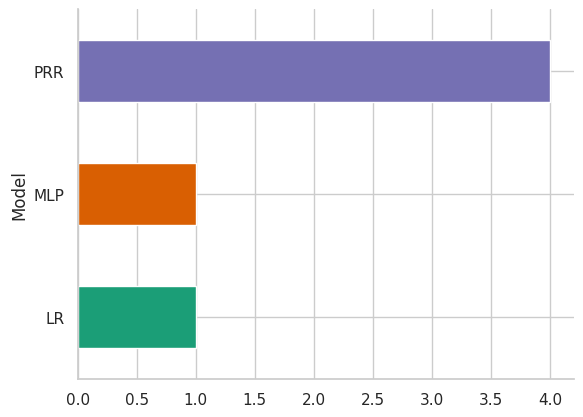

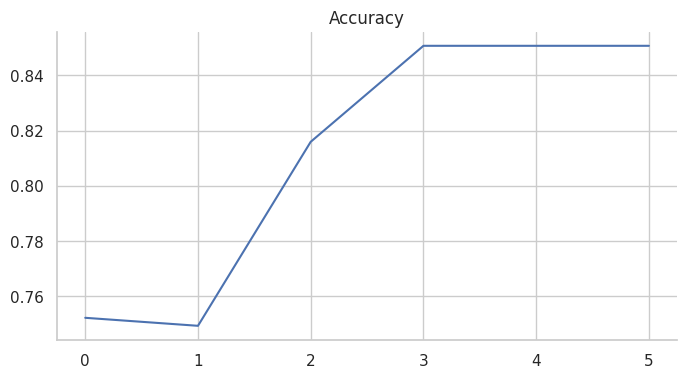

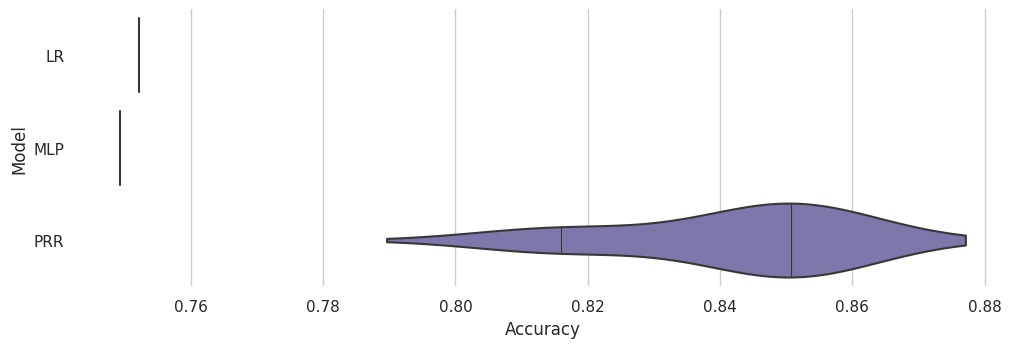

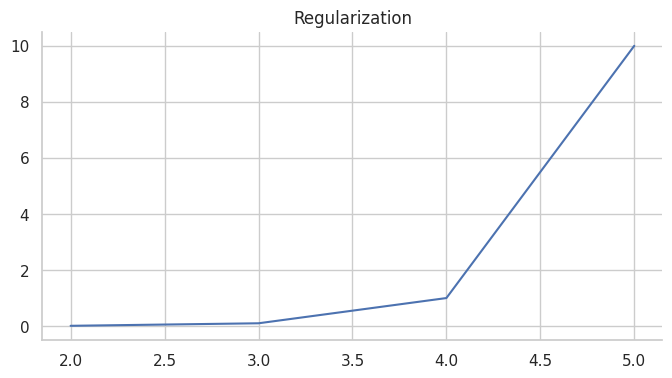

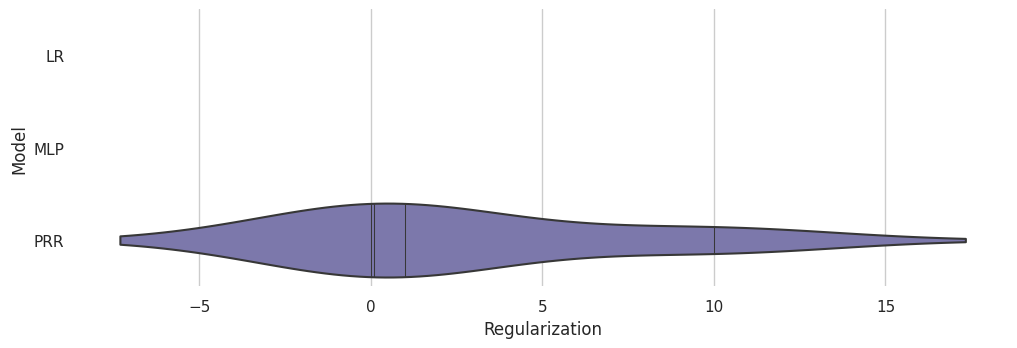

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

result_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

result_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

figsize = (12, 1.2 * len(result_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

result_df['Regularization'].plot(kind='line', figsize=(8, 4), title='Regularization')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

figsize = (12, 1.2 * len(result_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(result_df, x='Regularization', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()



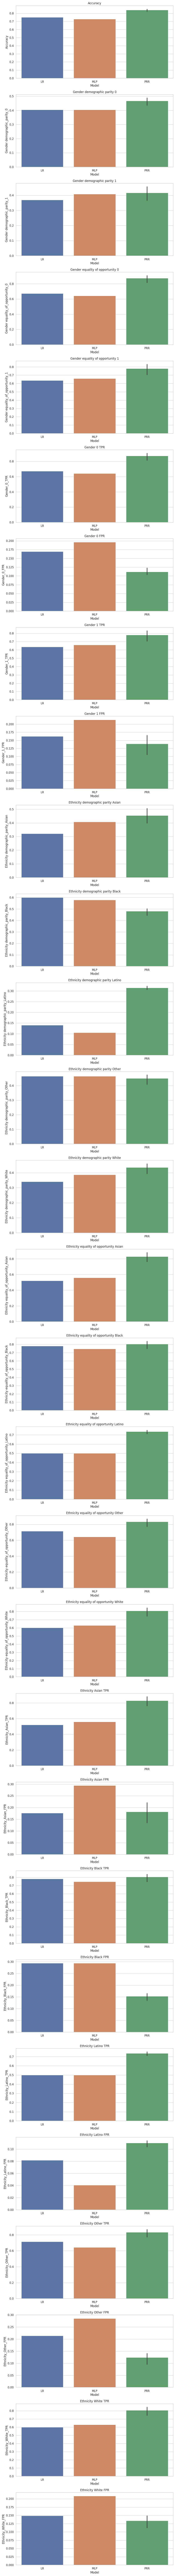

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def extract_values(row, metric):
    if isinstance(row[metric], dict):
        for key, value in row[metric].items():
            row[f"{metric}_{key}"] = value
    return row

draw_metrics = [
    'Gender demographic_parity',
    'Gender equality_of_opportunity',
    'Ethnicity demographic_parity',
    'Ethnicity equality_of_opportunity'
]

for met in draw_metrics:
    result_df = result_df.apply(lambda row: extract_values(row, met), axis=1)


# Flatten the nested dictionaries for equality_of_odds
def flatten_equality_of_odds(row, prefix):
    odds_data = row[f'{prefix} equality_of_odds']
    for group, metrics in odds_data.items():
        for metric_name, value in metrics.items():
            column_name = f'{prefix}_{group}_{metric_name}'
            row[column_name] = value
    return row

result_df = result_df.apply(lambda row: flatten_equality_of_odds(row, 'Gender'), axis=1)
result_df = result_df.apply(lambda row: flatten_equality_of_odds(row, 'Ethnicity'), axis=1)



# new columns we got like 'Gender_0_TPR', 'Gender_0_FPR', 'Ethnicity_Asian_TPR', 'Ethnicity_Asian_FPR', etc.

# list of metrics to plot,
metrics = [
    'Accuracy',
    'Gender demographic_parity_0',
    'Gender demographic_parity_1',
    'Gender equality_of_opportunity_0',
    'Gender equality_of_opportunity_1',
    'Gender_0_TPR',
    'Gender_0_FPR',
    'Gender_1_TPR',
    'Gender_1_FPR',
    'Ethnicity demographic_parity_Asian',
    'Ethnicity demographic_parity_Black',
    'Ethnicity demographic_parity_Latino',
    'Ethnicity demographic_parity_Other',
    'Ethnicity demographic_parity_White',
    'Ethnicity equality_of_opportunity_Asian',
    'Ethnicity equality_of_opportunity_Black',
    'Ethnicity equality_of_opportunity_Latino',
    'Ethnicity equality_of_opportunity_Other',
    'Ethnicity equality_of_opportunity_White',
    'Ethnicity_Asian_TPR', 'Ethnicity_Asian_FPR',
    'Ethnicity_Black_TPR',
    'Ethnicity_Black_FPR',
    'Ethnicity_Latino_TPR',
    'Ethnicity_Latino_FPR',
    'Ethnicity_Other_TPR',
    'Ethnicity_Other_FPR',
    'Ethnicity_White_TPR',
    'Ethnicity_White_FPR'
]

# Set up matplotlib figure
num_metrics = len(metrics)
fig, axes = plt.subplots(num_metrics, figsize=(10, 5 * num_metrics))

# Loop through each metric and create a bar plot
for i, metric in enumerate(metrics):
    if metric in result_df.columns:  # Only plot if the metric column is present
        sns.barplot(ax=axes[i], x='Model', y=metric, data=result_df)
        axes[i].set_title(metric.replace('_', ' '))


plt.tight_layout()
plt.show()

#Here are some observations

##Accuracy Across Models:

The accuracy of the Logistic Regression (LR) model is the lowest (0.752174).
When compared to LR, the Multi-Layer Perceptron (MLP) model has a significantly poorer accuracy (0.744928).
The Penalized Regression Model (PRR) outperforms the LR and MLP in terms of accuracy, with all PRR models having identical accuracies (0.850725) for different regularization values except one, which has an accuracy of 0.815942.
## Gender Fairness Metrics:

* **Demographic Parity:**
With PRR models, the difference between groups 0 and 1 appears to decrease as regularization rises. The PRR model with 10.00 regularization shows the least difference between groups 0 and 1, indicating improved gender demographic parity.

* **Equality of Opportunity:**
When compared to LR and MLP, the PRR models often exhibit higher values for both groups, indicating that they are more likely to accurately categorize the positive class among the real positives for both gender groups.

* **Equality of Odds:**
When compared to LR and MLP, the PRR models improve both the True Positive Rate (TPR) and the False Positive Rate (FPR) for gender groups. Again, regularization appears to affect odds equality, with stronger regularization often leading to larger TPRs.

## Ethnicity Fairness Metrics:

Demographic Parity: When compared to LR and MLP, the PRR models have a more balanced demographic parity across different ethnic groups, with the regularization parameter seemingly effecting the balance.
Equality of Opportunity: Similar to gender, the PRR models appear to perform better across ethnic groupings in terms of correctly categorizing the positive class among true positives.
Equality of Odds: Higher regularization PRR models demonstrate superior TPR and FPR for ethnic groups.


##Regularization:

The fairness metrics and accuracy of the PRR models appear to be sensitive to the regularization parameter. There is a general tendency of improvement in fairness indicators as regularization grows. Regularization values of 0.10, 1.00, and 10.00 result in the same accuracy but varied slightly in fairness metrics, indicating that these regularization levels maximize the balance between model complexity and fairness.


## Overall Fairness:

Fairness metrics are numerous, and trade-offs must occasionally be made between them. When compared to the LR and MLP models, it appears that the PRR models are more equitable across gender and ethnicity, especially as the regularization parameter increases.
